## Final Project Submission

* Student name: Travis Royce
* Student pace: self paced
* Scheduled project review date/time: None Yet
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Microsoft Film Division Movie Analysis

## Project Overview

For this project, you will use exploratory data analysis to generate insights for a business stakeholder.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. This analys explores what types of films are currently doing the best at the box office. This can be translated into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## Data Understanding

The data provided is from the following sources:
- Box Office Mojo (https://www.boxofficemojo.com/) 
- IMDB (https://www.imdb.com/) 
- Rotten Tomatoes (https://www.rottentomatoes.com/) 
- TheMovieDB (https://www.themoviedb.org/)
- The Numbers (https://www.the-numbers.com/)

## Analysis Method

There are a variety of metrics that could be used to analyze what types of movies to make. In my opinion, the most important question for a company is "what type of movies are the most profitable?". The second most important question may be "what kind of movies are popular?" which could be deduced through topline revenue analysis, as opposed to bottom-line profit. The third most important question is "what kind of movies do people love?" This question can be analyzed through review data, and has nothing to do with profits. 

These metrics include: 1) median ROI, 2) probability of profitability, 3) top-line revenue, and 4) median review rating.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns


## Data Retrieval and Cleaning
The data from IMDB is by far the largest dataset, with eight tables nested within the dataset. 

In [2]:
conn = sqlite3.connect("im.db")
cur = conn.cursor()

In [3]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

In [4]:
# Identify IMDB Table Names
table_names = cur.fetchall()
print(f' The table_names include: {table_names}')


 The table_names include: [('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [5]:
# Query the Movie Basics Table
mb_query = \
"""
SELECT *
FROM movie_basics
"""
cur.execute(mb_query)
# Movie Basics Table
mb_df = pd.read_sql(mb_query, conn)
mb_df.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [6]:
# Query the Directors Table
directors_query = \
"""
SELECT *
FROM directors
"""

cur.execute(directors_query)
dir_df = pd.read_sql(directors_query, conn)
dir_df.head(3)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540


In [7]:
# Query the Known For table
kf_query = \
"""
SELECT *
FROM known_for
"""

cur.execute(kf_query)
known_for_df = pd.read_sql(kf_query, conn)

print(known_for_df.head(3))
print(known_for_df.shape)

   person_id   movie_id
0  nm0061671  tt0837562
1  nm0061671  tt2398241
2  nm0061671  tt0844471
(1638260, 2)


In [8]:
# Query the Movie_akas Table
aka_query = \
"""
SELECT *
FROM movie_akas
"""

cur.execute(aka_query)

aka_df = pd.read_sql(aka_query, conn)
aka_df.head(3)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0


In [9]:
# Query the Movie_ratings Table
mov_rtg_query = \
"""
SELECT *
FROM movie_ratings
"""

cur.execute(mov_rtg_query)

movie_ratings_df = pd.read_sql(mov_rtg_query, conn)
print(movie_ratings_df.head(3))
print(movie_ratings_df.shape)

     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
(73856, 3)


In [10]:
# Query the Persons Table
persons_query = \
"""
SELECT *
FROM persons
"""

cur.execute(persons_query)

persons_df = pd.read_sql(persons_query, conn)
persons_df.head(3)


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"


In [11]:
# Query the Principals Table
princ_query = \
"""
SELECT *
FROM principals
"""

cur.execute(princ_query)

principals_df = pd.read_sql(persons_query, conn)
principals_df.head(3)


,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"


In [12]:
# Query the Writers Table
writers_query = \
"""
SELECT *
FROM writers
"""

cur.execute(writers_query)

writers_df = pd.read_sql(writers_query, conn)
writers_df.head(3)


,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864


This concludes the unpacking of the IMDB database. 

### Unpacking movie_budgets

In [13]:
movie_budgets_df = pd.read_csv('tn.movie_budgets.csv')
movie_budgets_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,7-Jun-19,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


### Unpacking movie_gross

In [14]:
movie_gross_df = pd.read_csv('bom.movie_gross.csv')
movie_gross_df.head()
movie_gross_df.head(3)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


### Observations

The dataframes `movie_gross` and `movie_budgets` are very similar, with the main difference being the Studio that produced the movie listed in movie_gross, and not in `movie_budgets`. Further, `movie_gross` does not have production budgets, which is important when analyzing movies for the profit they create. 

### Unpacking tmdb.movies.csv

In [15]:
tmdb_mov_df = pd.read_csv('tmdb.movies.csv')
tmdb_mov_df.head()
tmdb_mov_df.head(3)


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


### Unpacking rt.movie_info.tsv

In [16]:
movinfo_df = pd.read_csv('rt.movie_info.tsv', delimiter = '\t')
movinfo_df
movinfo_df.head(3)


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


While thie `rt.movie_info` table has new information in it -- namely synopsys -- it only has 1500 observations, leading me to think it may have limited use in this case. 

### Unpacking rt.reviews.tsv


In [17]:
reviews_df = pd.read_csv(
    'rt.reviews.tsv', delimiter = '\t', encoding= 'unicode_escape')
reviews_df
reviews_df.head(3)


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


### Profit and Return on Investment Features

As this analysis is to be used for corporate purposes, the most important metrics should be profit metrics, as opposed to ratings. It would be of little use for the company to make well-rated movies which lost money, unless it was part of a branding strategy.  

### Feature Engineering
There is only one dataframe that includes the necessary information to calculate profit and profit-based metrics, the `movie_budgets` dataframe. I will create 'profit' and 'ROI' features from this dataset. ROI is calculated as 1) net return on investment divided by 2) the cost of investment. 

In [18]:
# Changing columns to numeric type to calculate profit and ROI
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace('$', '')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace('$', '')
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].str.replace(',', '')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].str.replace(',', '')
movie_budgets_df.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,18-Dec-09,Avatar,425000000,"$760,507,625",2776345279
1,2,20-May-11,Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875",1045663875
2,3,7-Jun-19,Dark Phoenix,350000000,"$42,762,350",149762350
3,4,1-May-15,Avengers: Age of Ultron,330600000,"$459,005,868",1403013963
4,5,15-Dec-17,Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382",1316721747


In [19]:
movie_budgets_df['worldwide_gross'] = pd.to_numeric(movie_budgets_df['worldwide_gross'])
movie_budgets_df['production_budget'] = pd.to_numeric(movie_budgets_df['production_budget'])
# Calculating profit column
movie_budgets_df['profit'] = (
    movie_budgets_df.worldwide_gross - movie_budgets_df.production_budget)

In [20]:
# Calculating ROI column
movie_budgets_df['ROI'] = (
    movie_budgets_df.profit / movie_budgets_df.production_budget) * 100

#Sort all movies by ROI
roi_df = movie_budgets_df.sort_values('ROI', ascending = False)

### Joining Tables and Data Cleaning

Next, I would like to add genre to these movies. 

Genre is in `mb_df`, so I will join that data frame with `movie_budgets_df`.

In [21]:
# Change column name for ease 
mb_df['movie'] = mb_df['primary_title']
mb_df.head(3)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",Sunghursh
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",One Day Before the Rainy Season
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,The Other Side of the Wind


In [22]:
#Join dataframes to make new dataframe
new_roi_df = pd.merge(roi_df, mb_df, how = 'left', on = 'movie')

In [23]:
# Join dataframes to make new dataframe
new3_roi_df = roi_df.set_index('movie').join(mb_df.set_index('movie'))
new3_roi_df.sort_values('ROI', ascending = False)

,id,release_date,production_budget,domestic_gross,worldwide_gross,profit,ROI,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
movie,,,,,,,,,,,,,
Deep Throat,46,30-Jun-72,25000,"$45,000,000",45000000,44975000,179900.000000,NaN,NaN,NaN,NaN,NaN,NaN
Mad Max,14,21-Mar-80,200000,"$8,750,000",99750000,99550000,49775.000000,NaN,NaN,NaN,NaN,NaN,NaN
Paranormal Activity,93,25-Sep-09,450000,"$107,918,810",194183034,193733034,43051.785333,NaN,NaN,NaN,NaN,NaN,NaN
The Gallows,80,10-Jul-15,100000,"$22,764,410",41656474,41556474,41556.474000,tt2309260,The Gallows,The Gallows,2015.0,81.0,"Horror,Mystery,Thriller"
The Blair Witch Project,7,14-Jul-99,600000,"$140,539,099",248300000,247700000,41283.333333,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sharkskin,86,19-Jan-16,2100000,$0,0,-2100000,-100.000000,tt2317796,Sharkskin,Sharkskin,2015.0,100.0,"Comedy,Drama,Mystery"
Against the Wild,33,11-Mar-14,1800000,$0,0,-1800000,-100.000000,NaN,NaN,NaN,NaN,NaN,NaN
Shark Lake,1,1-Dec-15,2000000,$0,0,-2000000,-100.000000,tt4416518,Shark Lake,Shark Lake,2015.0,92.0,"Action,Adventure,Crime"


In [24]:
#Change title and join dataframes
mb_df['movie'] = mb_df['primary_title']
new4_roi_df = mb_df.set_index('movie').join(roi_df.set_index('movie'))
new4_roi_df = new4_roi_df.sort_values('ROI', ascending = False)

In [25]:
# Remove Duplicates and NaN
new4_roi_df = new4_roi_df.drop_duplicates()
new4_roi_df = new4_roi_df.drop_duplicates(subset = 'movie_id')
new4_roi_df = new4_roi_df.dropna(
    subset = ['production_budget','worldwide_gross'])

In [26]:
# Was the movie profitable? Adding feature / column.
new4_roi_df['profitable'] = np.where(new4_roi_df['profit'] > 0, 1, 0)

In [27]:
# Getting the median ROI per genre.
agg_df = new4_roi_df.groupby('genres')['ROI'].agg(['median','count', 'mean', 'std']).reset_index()
# Sort by median ROI
agg_df = agg_df.sort_values(by = ('median'), ascending=False)
# Round the aggregate numbers
agg_df['median'] = round(agg_df['median'], 0)
agg_df['mean'] = round(agg_df['mean'], 0)
agg_df['std'] = round(agg_df['std'], 0)


In [28]:
# Split the genres column into multiple columns, to seperate the genres.
sep_genre_df = pd.concat([new4_roi_df, new4_roi_df['genres'].str.split(
    ',', expand=True)], axis=1)
# Rename genres columns
sep_genre_df = sep_genre_df.rename(
    columns={0: 'genre_primary', 1: 'genre_secondary', 2: 'genre_three'})
# Group by primary genres
prime_genre_df = sep_genre_df.groupby(
    'genre_primary')['ROI'].agg(
        ['median','count', 'mean', 'std']).reset_index()
# Sort by median value
prime_genre_df = prime_genre_df.sort_values('median', ascending = False)
# Filter out primary genres with counts under 25
prime_genre_df = prime_genre_df.loc[prime_genre_df['count'] > 24]
prime_genre_df.head()

,genre_primary,median,count,mean,std
2,Animation,252.443607,34,1059.800437,2602.065467
1,Adventure,108.434088,242,222.898272,637.145146
15,Sci-Fi,99.410673,28,198.574487,378.132969
10,Horror,82.819650,216,1006.348182,3812.278396
0,Action,77.785911,667,251.682919,1321.816297


In [29]:
#Join the tables for ratings analysis
ratings_df = mb_df.set_index('movie_id').join(movie_ratings_df.set_index('movie_id'))

# Only interested in movies in the last 5 years
ratings_df = ratings_df.loc[ratings_df['start_year'] > 2016] 

# Filter out movies with less than 1000 ratings
ratings_df = ratings_df.loc[ratings_df['numvotes'] > 999]

# Sort by rating
ratings_df = ratings_df.sort_values('averagerating', ascending = False)

# Split the genres column into multiple columns, to seperate the genres.
genres_rtg_df = pd.concat([ratings_df, ratings_df['genres'].str.split(
    ',', expand=True)], axis=1)

# Rename columns
genres_rtg_df = genres_rtg_df.rename(
    columns={0: 'genre_primary', 1: 'genre_secondary', 2: 'genre_three'})

# New dataframe for ratings analysis
genre_ratings_df = genres_rtg_df.groupby(
    'genre_primary')['averagerating'].agg(
        ['median','count', 'mean', 'std']).reset_index()

# Filter out genres with under 25 observations
genre_ratings_df = genre_ratings_df.loc[genre_ratings_df['count'] > 24]

# Sort Ratings
genre_ratings_df = genre_ratings_df.sort_values('median', ascending = False)

In [30]:
# Create new dataframe with profitability counts
profitable_genres = sep_genre_df.groupby(
    'genre_primary')['profitable'].agg(
        ['sum','count', 'mean', 'std']).reset_index()

# Sorted by mean (which is percentage profitable)
profitable_genres =profitable_genres.sort_values('mean', ascending=False)

# Filter out genres with under 25 observations
profitable_genres = profitable_genres.loc[profitable_genres['count'] > 24]

Because I know I want to look at data regarding directors, I also make a new dataframe to analyze the directors. 

In [31]:
#Join movie basics and Directors
basics_n_dir = mb_df.set_index('movie_id').join(dir_df.set_index('movie_id'))
basics_n_dir = basics_n_dir.reset_index()

# join persons to director to get director name
basics_n_dir = pd.merge(basics_n_dir,persons_df,on='person_id',how='outer')
basics_n_dir = basics_n_dir.drop_duplicates()
basics_n_dir = basics_n_dir.rename(columns={'primary_name':'director'})

#Join basics and directors with ROI
direct_df = pd.merge(basics_n_dir, movie_budgets_df, on= 'movie', how = 'left')
direct_df.reset_index()

# Remove NaN rows in the important categories
direct_df = direct_df.dropna(subset = ['worldwide_gross', 'director'])

# Add profitable column 
direct_df['profitable'] = np.where(direct_df['profit']> 0, 1, 0)
direct_df.head()

#Get rid of movies over a decade old
direct_df = direct_df.loc[direct_df['start_year'] > 2011]

# Group by director
direct_df = direct_df.groupby('director')['profitable'].agg(
    ['sum','count', 'mean', 'std'])
direct_df.sort_values('count', ascending = False)

,sum,count,mean,std
director,,,,
Tim Story,7,8,0.875000,0.353553
Steven Spielberg,6,6,1.000000,0.000000
Peter Berg,4,6,0.666667,0.516398
David Gordon Green,3,6,0.500000,0.547723
Antoine Fuqua,5,5,1.000000,0.000000
...,...,...,...,...
John Lyde,0,1,0.000000,NaN
John Luksetich,1,1,1.000000,NaN
John Luessenhop,1,1,1.000000,NaN


## Analysis

To begin, I analyzed the distribution of Return on Investment for films. A great number of films - the mode in the distribution - have a negative 100% ROI, effectively losing most (if not all) of the investment. 

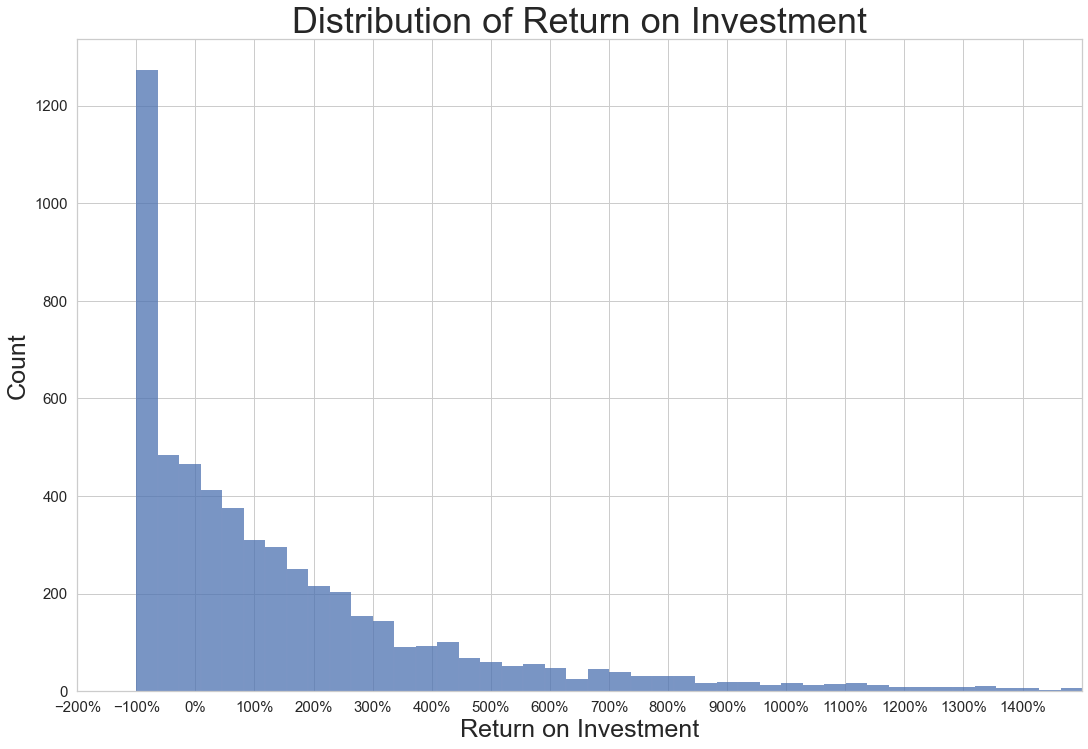

In [32]:
# Plot the Production budgets distribution
sns.set_theme(style = 'whitegrid')
f, ax = plt.subplots(figsize=(18,12))
sns.set(font_scale = 3)
# Create histogram
sns.histplot(data = movie_budgets_df, x="ROI")
# Format
plt.xlim(left = -200, right = 1500)
ax.set_xticks([-200, -100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel( "Return on Investment", fontsize = 25)
plt.ylabel("Count", fontsize=25)
plt.title("Distribution of Return on Investment")
ax.tick_params(labelsize = 15)


### Median ROI by Genre

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Median ROI by Genre')

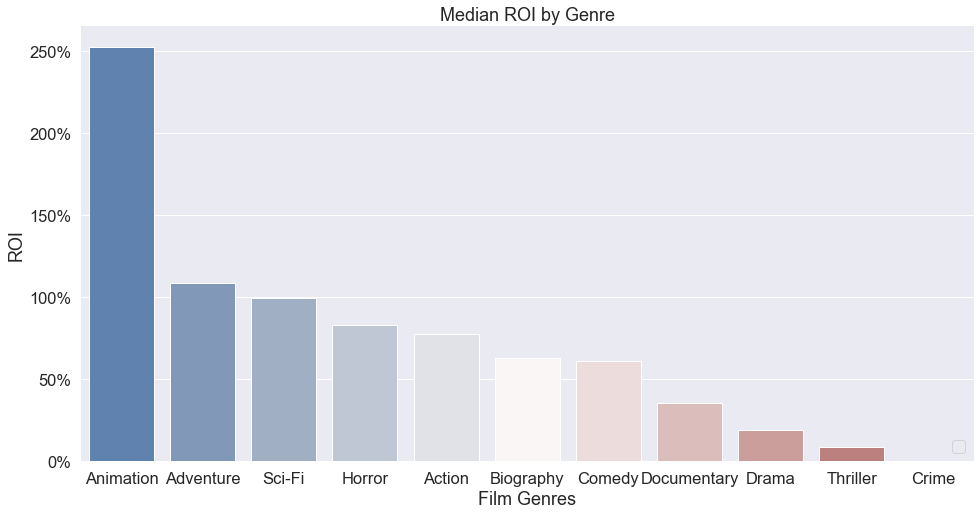

In [33]:
#plot primary genre vs median ROI
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
sns.set(font_scale = 1.5)
f, ax = plt.subplots(figsize=(16, 8))

#plot
sns.barplot(x="genre_primary", y="median", data=prime_genre_df,
             palette="vlag")

ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #Reformat to percent
# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( ylabel="ROI", xlabel="Film Genres")
sns.despine(left=True, bottom=True)
plt.title("Median ROI by Genre")

### ROI by Genre Boxplots

In [34]:
#Count movies per primary genre
sep_genre_df['genre_count'] = sep_genre_df.groupby('genre_primary')['genre_primary'].transform('count')

#Subset the portion of the dataframe I want to analyze
sep_genre_df = sep_genre_df.loc[sep_genre_df['genre_count'] > 24]
sep_genre_df = sep_genre_df.loc[sep_genre_df['start_year'] > 2011]

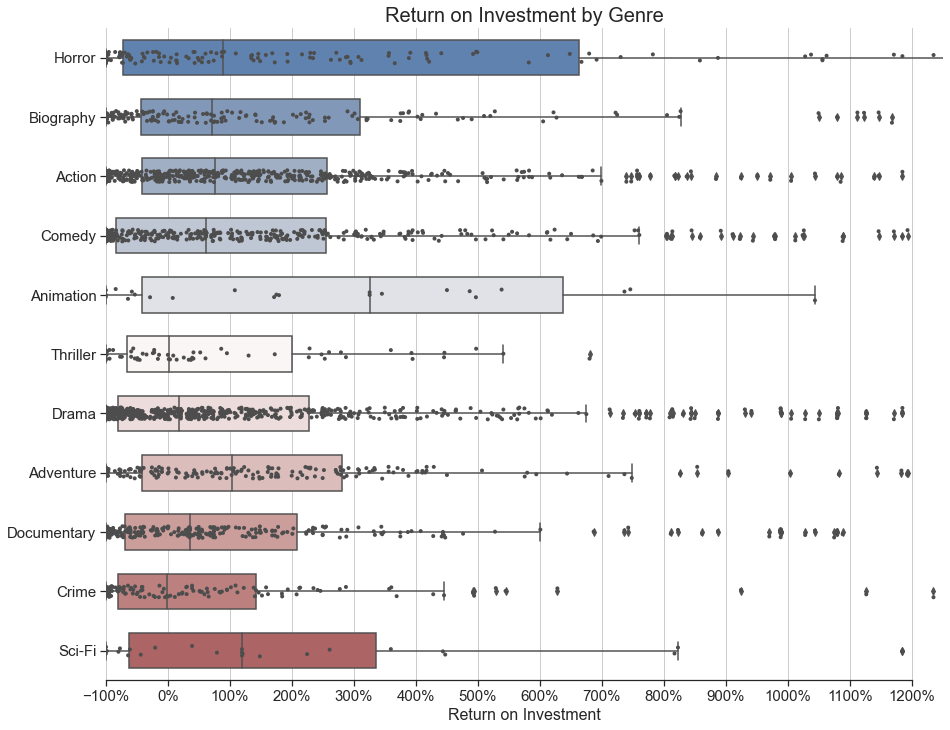

In [35]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale = 1.5)

# Plot with horizontal boxes
sns.boxplot(x="ROI", y="genre_primary", data=sep_genre_df,
            width=.6, palette="vlag")

# Add observations
sns.stripplot(x="ROI", y="genre_primary", data=sep_genre_df,
              size=4, color=".3", linewidth=0)

#Reformat to percent
ax.xaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.xlabel('Return on Investment', fontsize = 16)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

# Format
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlim=(-100, 1250))
ax.set_xticks([-100, 0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
plt.title('Return on Investment by Genre', fontsize = 20)
sns.despine(trim=True, left=True)


### Profitable Film Percentage by Genre
Another way to look at it would be to see what percentage of movies in a given genre were profitable. 

Text(0.5, 0, 'Film Genres')

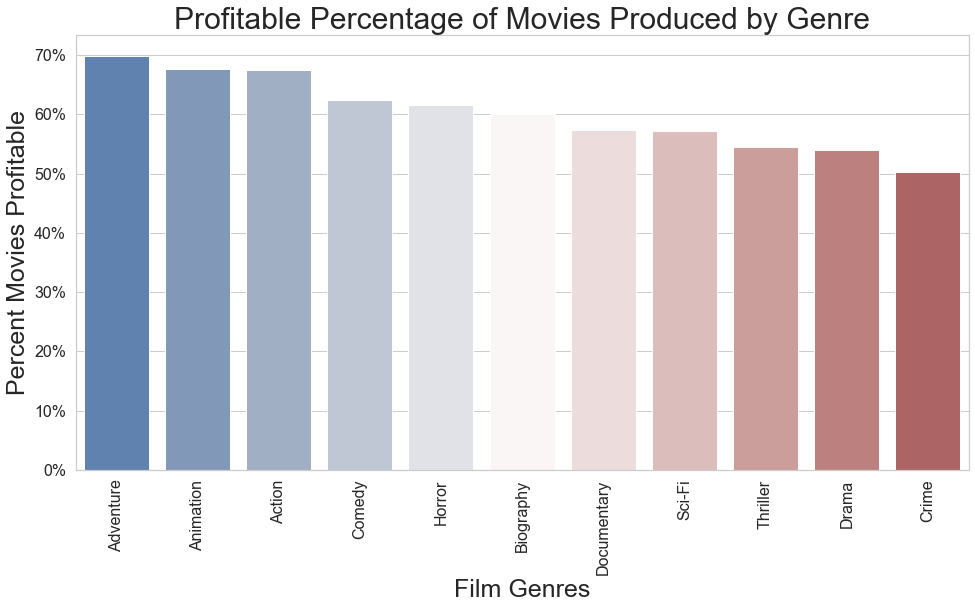

In [36]:
# Plot primary genres vs profitability percentage
import matplotlib.ticker as mtick
sns.set_theme(style="whitegrid")
sns.set_color_codes("muted")
f, ax = plt.subplots(figsize=(16, 8))
sns.set(font_scale = 1.5)

genres = list(profitable_genres['genre_primary'])
values = list(profitable_genres['mean']*100)

# Format
ax.tick_params(labelsize = 16)
#Rotate X-axis tick labels
plt.xticks(rotation = 90)
#Format
sns.barplot(x = genres, y = values, palette = 'vlag')
ax.yaxis.set_major_formatter(mtick.PercentFormatter()) 
plt.title("Profitable Percentage of Movies Produced by Genre", size = 30)
plt.ylabel("Percent Movies Profitable", size = 25)
plt.xlabel("Film Genres", size = 25)

Movies in the adventure genre are profitable 70 percent (rounded) of the time in this dataset, making adventure the most commonly profitable genre. Closely following the adventure genre is the animation and action genres, both around 67.5 percent profitable. 

The comedy and horror genres achieve profitability 62 percent (rounded) of the time. 

## Movie Ratings by Genre

From this data, we see that the higher rated genres are not the same as the higher profiting genres. 

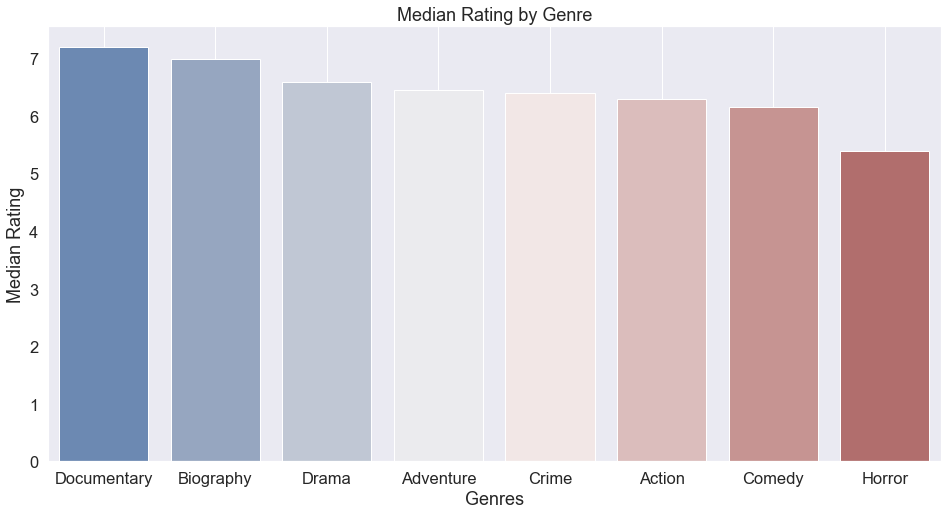

In [37]:
#Plot median rating by genre
genres = list(genre_ratings_df['genre_primary'])
values = list(genre_ratings_df['median'])
sns.set(font_scale = 1.5)

fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x = genres, y = values, palette = 'vlag')
plt.title("Median Rating by Genre")
plt.ylabel("Median Rating")
plt.xlabel("Genres")
plt.grid()

## Profitable Directors

Now, I want to see the directors who have made more than two movies in the last decade, and determine who has the best track record for profitability. I also want to filter out any director with under a 75% profitability rate. 

In [38]:
#Filter out directors with less than 4 movies and less than a 
# 75% profitablility rate
direct_df = direct_df.loc[direct_df['count'] > 3] 
direct_df = direct_df.sort_values('mean', ascending=False)
direct_df = direct_df.loc[direct_df['mean'] > .75]
direct_df= direct_df.reset_index()

Text(0.5, 0, 'Directors')

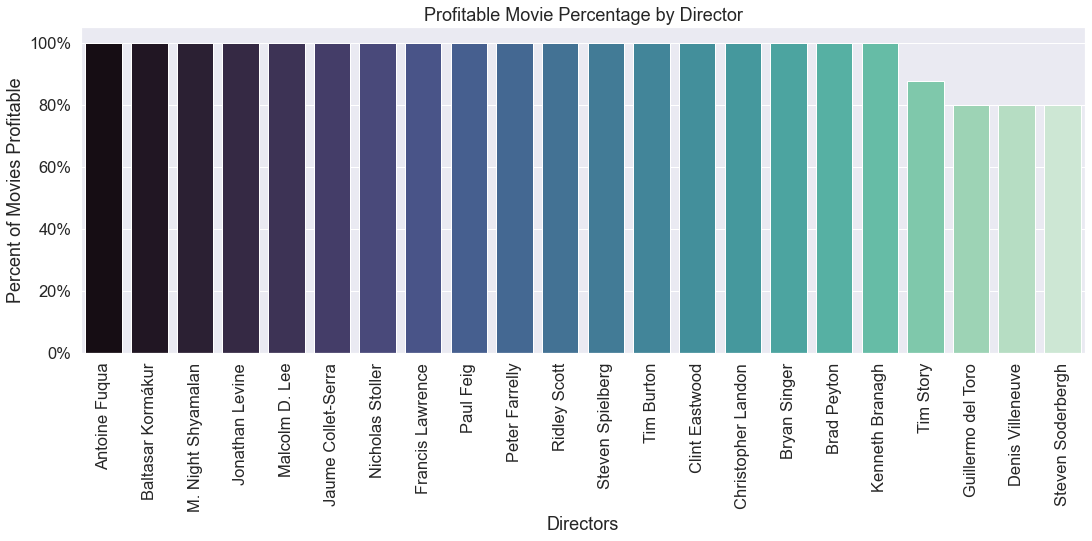

In [39]:
# Plot most profitable directors

y = list(direct_df['mean']*100)
n = list(direct_df['count'])
x = list(direct_df['director'])


#plot
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x = x, y=y, palette='mako')

#Rotate axis tick labels
plt.xticks(rotation = 90) 
sns.despine(f)

#Reformat to Percent
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

sns.set(font_scale = 1.5)

#Labels
plt.title("Profitable Movie Percentage by Director")
plt.ylabel("Percent of Movies Profitable")
plt.xlabel("Directors")

From this, we see that we get a list of the most profitable directors by percentage of movies profitable. 

In [40]:
prof_directors = direct_df['director']

print(f''' The 22 most consistantly profitable directors of the past ten years are: 
{prof_directors}''')

 The 22 most consistantly profitable directors of the past ten years are: 
0          Antoine Fuqua
1      Baltasar Kormákur
2     M. Night Shyamalan
3        Jonathan Levine
4         Malcolm D. Lee
5     Jaume Collet-Serra
6       Nicholas Stoller
7       Francis Lawrence
8              Paul Feig
9         Peter Farrelly
10          Ridley Scott
11      Steven Spielberg
12            Tim Burton
13        Clint Eastwood
14    Christopher Landon
15          Bryan Singer
16           Brad Peyton
17       Kenneth Branagh
18             Tim Story
19    Guillermo del Toro
20      Denis Villeneuve
21     Steven Soderbergh
Name: director, dtype: object


## Gross Revenue by Genre
Finally, I want to take a look at the types of movies that are earning the highest nominal revenues. 

In [41]:
# Group by primary genres
prime_genre_df2 = sep_genre_df.groupby(
    'genre_primary')['worldwide_gross'].agg(
        ['median','count', 'mean', 'std']).reset_index()
# Sort by median value
prime_genre_df2 = prime_genre_df2.sort_values('median', ascending = False)
# Filter out primary genres with counts under 25
prime_genre_df2 = prime_genre_df2.loc[prime_genre_df2['count'] > 24]

Text(0.5, 0, 'Genres')

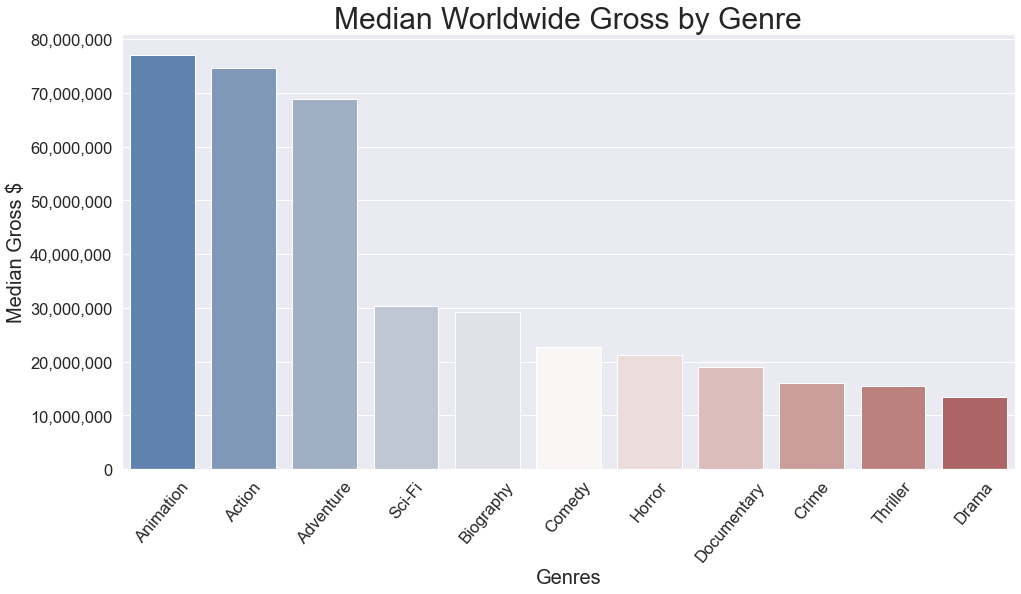

In [42]:
#plot primary genre vs median Worldwide Gross
from matplotlib.ticker import FormatStrFormatter

x1 = list(prime_genre_df2['genre_primary'])
y1 = list(prime_genre_df2['median'])

sns.set(font_scale = 1.5)

fig, axs = plt.subplots(figsize=(16, 8))
plt.xticks(rotation = 50) #Rotate X-axis tick labels
sns.barplot(x=x1, y=y1, palette = 'vlag')

plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

plt.title("Median Worldwide Gross by Genre", size = 30)
plt.ylabel('Median Gross $', size = 20)
plt.xlabel('Genres', size = 20)

## Are Ratings Correlated with ROI?

To find out, we need to join the ratings dataframe with the ROI dataframe.

In [43]:

rat_vs_roi_df = pd.merge(ratings_df, sep_genre_df, how = 'outer', on = 'movie')
rat_vs_roi_df = rat_vs_roi_df.dropna(subset = ['ROI'])


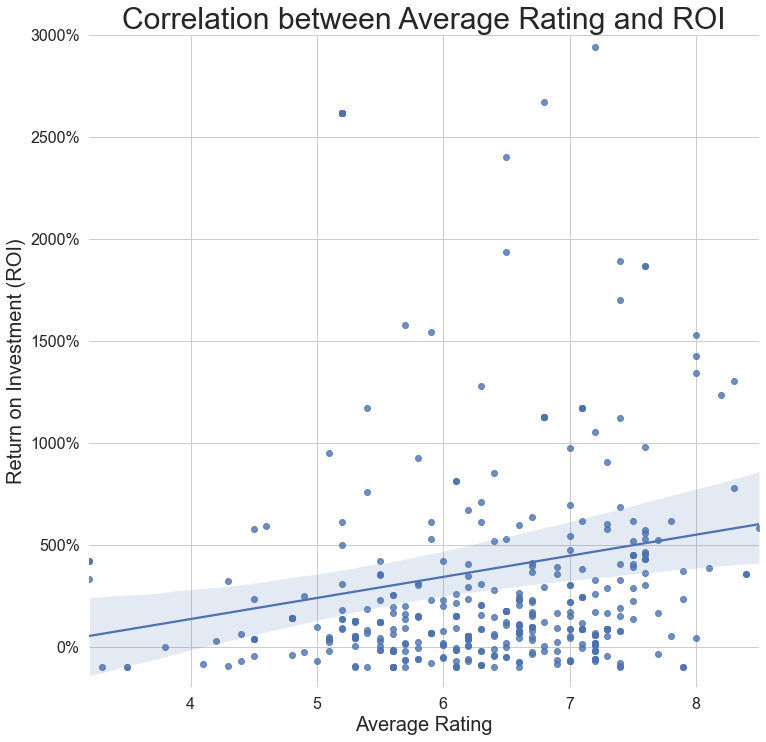

In [44]:

sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f, left=True, bottom=True)
sns.regplot(x="averagerating", y="ROI",
                data=rat_vs_roi_df, ax=ax)
plt.ylim(-200,3000)
plt.title("Correlation between Average Rating and ROI", size = 30)
plt.xlabel("Average Rating", size = 20)
plt.ylabel("Return on Investment (ROI)", size = 20)
ax.tick_params(labelsize = 16)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

In [45]:
correlation = rat_vs_roi_df.corr()
print(correlation['ROI'])

start_year_x         0.059949
runtime_minutes_x   -0.037798
averagerating        0.079621
numvotes             0.124920
start_year_y         0.003213
runtime_minutes_y   -0.064619
id                   0.028928
production_budget   -0.074208
worldwide_gross      0.089343
profit               0.128288
ROI                  1.000000
profitable           0.210280
genre_count         -0.051231
Name: ROI, dtype: float64


## Conclusions

If Microsoft is shooting for likelihood of profitability, they should focus on the five most consistantly profitable genres (in order): Adventure, Animation, Action, Comedy, and Horror. 

To improve the company's probability of profitability, I would suggest they hire one of the 22 directors from the "most profitable directors" list, which all have 1) made more than three movies in the past ten years, and 2) have made profitable movies over 75 percent of the time.

If Microsoft wants the best return on investment (ROI), they should consider making films in the following genres (in order): Animation, Adventure, Sci-Fi, Horror, Action.

If Microsoft wants the highest top-line revenue (i.e., worldwide gross), they should consider making films in the genres Adventure, Action, or Animation. 

Finally, if Microsoft wants to make highly-rated movies, they should consider making films in the genres (in order): Documentary, Biography, Drama, Adventure, Crime, Action, or Comedy. 

To consider multiple factors in the decision, the company should focus on Adventure, Animation, and Action, which all score highly in almost all of the categories considered. They should further look to hire one of the 22 directors on the list of most consistantly profitable directors. 



## Next Steps
There are many correlations that could be run from here, including: 
- Furthering the correlation from ratings to ROI by stratifying by genre. 
- Furthering the correlation from ratings to ROI by stratifying by budget.
- Budget and ROI correlation

I would also want to look at:
- Profitability and ROI by actor
- Profitability and ROI by writer
- ROI stratified by both year and genre to determine how ROI has changed over time. 